In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/raily/Desktop/hotel_pricing/RL_Agent/03_数据文件/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
df['lead_time'].median()

69.0

<BarContainer object of 479 artists>

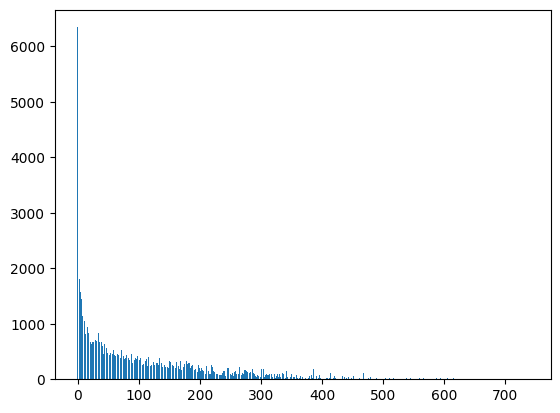

In [10]:
count = df['lead_time'].value_counts()
plt.bar(count.index, count.values)

In [15]:
df_c = df[df['hotel'] == 'City Hotel']
df_c.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [17]:
df_c.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
df_c[['distribution_channel', 'adr', 'arrival_date_month']].groupby(
    ['distribution_channel', 'arrival_date_month']
).agg({
    'adr': ['mean',lambda x:x.mean()/x.quantile(0.70), 'median',lambda x:x.median()/x.quantile(0.70), lambda x: x.quantile(0.70), lambda x: x.quantile(0.75)]
}).mean()

adr  mean          102.322869
     <lambda_0>      0.906923
     median        102.003776
     <lambda_1>      0.892685
     <lambda_2>    114.094612
     <lambda_3>    118.616071
dtype: float64

In [ ]:
df_c['distribution_channel'].value_counts()

distribution_channel
TA/TO        68945
Direct        6780
Corporate     3408
GDS            193
Undefined        4
Name: count, dtype: int64

In [29]:
df_c['market_segment'].value_counts()

market_segment
Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
Name: count, dtype: int64

In [27]:
df_c.groupby(['distribution_channel', 'arrival_date_month']).size()

distribution_channel  arrival_date_month
Corporate             April                  202
                      August                 186
                      December               196
                      February               241
                      January                305
                      July                   197
                      June                   461
                      March                  232
                      May                    406
                      November               375
                      October                270
                      September              337
Direct                April                  559
                      August                 988
                      December               443
                      February               532
                      January                366
                      July                   686
                      June                   591
                      March 